In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulacija_igre(N, K, seed=42):
    """
    Simulira bacanje novčića za N učenika, maksimalno K puta.
    Učenik ispada kada dobije glavu.
    
    Argumenti:
    - N: broj učenika
    - K: maksimalan broj bacanja
    - seed: seed za random generator
    
    Vraća:
    - dict: rječnik gdje su ključevi imena učenika, a vrijednosti broj pisama
    """
    np.random.seed(seed)
    rezultati = {}
    
    for ucenik in range(1, N + 1):
        broj_pisama = 0  # broj puta dobiven pismo (tails)
        
        for bacanje in range(K):
            # Bacanje novčića: 0 = pismo (tails), 1 = glava (heads)
            rezultat = np.random.randint(0, 2)
            
            if rezultat == 0:  # Dobiven pismo
                broj_pisama += 1
            else:  # Dobivena glava - učenik ispada
                break
        
        rezultati[f'Učenik {ucenik}'] = broj_pisama
    
    return rezultati

# Parametri simulacije
N = 32  # broj učenika
K = 5  # maksimalan broj bacanja

# Izvršavanje simulacije
rezultati = simulacija_igre(N, K)

# Prikaz rezultata
print("REZULTATI SIMULACIJE")
print("=" * 40)
print(f"Broj učenika: {N}")
print(f"Maksimalan broj bacanja po učeniku: {K}")
print("\n")

for ucenik, broj_pisama in rezultati.items():
    print(f"{ucenik}: {broj_pisama} pisma")

# Statistika
brojevi_pisama = list(rezultati.values())
print("\n" + "=" * 40)
print(f"Prosječan broj pisama: {np.mean(brojevi_pisama):.2f}")
print(f"Medijan: {np.median(brojevi_pisama):.0f}")
print(f"Min: {np.min(brojevi_pisama)}")
print(f"Max: {np.max(brojevi_pisama)}")

REZULTATI SIMULACIJE
Broj učenika: 32
Maksimalan broj bacanja po učeniku: 5


Učenik 1: 1 pisma
Učenik 2: 3 pisma
Učenik 3: 3 pisma
Učenik 4: 4 pisma
Učenik 5: 1 pisma
Učenik 6: 0 pisma
Učenik 7: 0 pisma
Učenik 8: 1 pisma
Učenik 9: 1 pisma
Učenik 10: 0 pisma
Učenik 11: 0 pisma
Učenik 12: 0 pisma
Učenik 13: 0 pisma
Učenik 14: 0 pisma
Učenik 15: 0 pisma
Učenik 16: 0 pisma
Učenik 17: 2 pisma
Učenik 18: 0 pisma
Učenik 19: 0 pisma
Učenik 20: 1 pisma
Učenik 21: 5 pisma
Učenik 22: 0 pisma
Učenik 23: 0 pisma
Učenik 24: 0 pisma
Učenik 25: 0 pisma
Učenik 26: 0 pisma
Učenik 27: 1 pisma
Učenik 28: 0 pisma
Učenik 29: 1 pisma
Učenik 30: 1 pisma
Učenik 31: 1 pisma
Učenik 32: 0 pisma

Prosječan broj pisama: 0.81
Medijan: 0
Min: 0
Max: 5


In [2]:
def ponovljena_simulacija(N, K, M, seed=42):
    """
    Ponavlja simulaciju M puta i broji koliko igrača je imalo točno K pisama.
    
    Argumenti:
    - N: broj učenika po simulaciji
    - K: broj pisama koje promatramo
    - M: broj ponavljanja simulacije
    - seed: seed za random generator
    
    Vraća:
    - dict: rječnik gdje su ključevi broj igrača koji su imali K pisama,
            a vrijednosti su koliko puta se to dogodilo
    """
    prebrojavanje = {}  # rječnik: {broj_igrača_s_K_pisama: broj_ponavljanja}
    
    np.random.seed(seed)
    
    for simulacija in range(M):
        # ispiši napredak svakih 10000 simulacija
        if (simulacija + 1) % 10000 == 0:
            print(f"Simulacija {simulacija + 1} od {M}...")
        # Izvršimo jednu simulaciju
        rezultati = simulacija_igre(N, K, seed=seed+simulacija)
        
        # Prebrojimo koliko igrača je imalo točno K pisama
        broj_igraca_s_K_pisama = sum(1 for broj_pisama in rezultati.values() if broj_pisama == K)
        
        # Zabilježimo rezultat
        if broj_igraca_s_K_pisama not in prebrojavanje:
            prebrojavanje[broj_igraca_s_K_pisama] = 0
        prebrojavanje[broj_igraca_s_K_pisama] += 1
    
    return prebrojavanje

# Parametri
M = 1000000  # broj ponavljanja simulacije

# Izvršavanje ponovljene simulacije
rezultati_m = ponovljena_simulacija(N, K, M)

# Prikaz rezultata
print("REZULTATI PONOVLJENE SIMULACIJE")
print("=" * 50)
print(f"Broj ponavljanja simulacije: {M}")
print(f"Broj učenika po simulaciji: {N}")
print(f"Broj pisama koje promatramo: {K}")
print("\n")
print("Koliko puta je određen broj igrača imao točno K pisama:")
print("-" * 50)

# Sortiranje po ključu za ljepši prikaz
for broj_igraca in sorted(rezultati_m.keys()):
    broj_ponavljanja = rezultati_m[broj_igraca]
    postotak = (broj_ponavljanja / M) * 100
    print(f"{broj_igraca} igrača: {broj_ponavljanja} puta ({postotak:.1f}%)")

print("-" * 50)
print(f"\nProsjek igrača koji su imali K={K} pisama: {np.mean([k*v for k, v in rezultati_m.items()]) / sum(rezultati_m.values()):.2f}")


Simulacija 10000 od 1000000...
Simulacija 20000 od 1000000...
Simulacija 30000 od 1000000...
Simulacija 40000 od 1000000...
Simulacija 50000 od 1000000...
Simulacija 60000 od 1000000...
Simulacija 70000 od 1000000...
Simulacija 80000 od 1000000...
Simulacija 90000 od 1000000...
Simulacija 100000 od 1000000...
Simulacija 110000 od 1000000...
Simulacija 120000 od 1000000...
Simulacija 130000 od 1000000...
Simulacija 140000 od 1000000...
Simulacija 150000 od 1000000...
Simulacija 160000 od 1000000...
Simulacija 170000 od 1000000...
Simulacija 180000 od 1000000...
Simulacija 190000 od 1000000...
Simulacija 200000 od 1000000...
Simulacija 210000 od 1000000...
Simulacija 220000 od 1000000...
Simulacija 230000 od 1000000...
Simulacija 240000 od 1000000...
Simulacija 250000 od 1000000...
Simulacija 260000 od 1000000...
Simulacija 270000 od 1000000...
Simulacija 280000 od 1000000...
Simulacija 290000 od 1000000...
Simulacija 300000 od 1000000...
Simulacija 310000 od 1000000...
Simulacija 320000

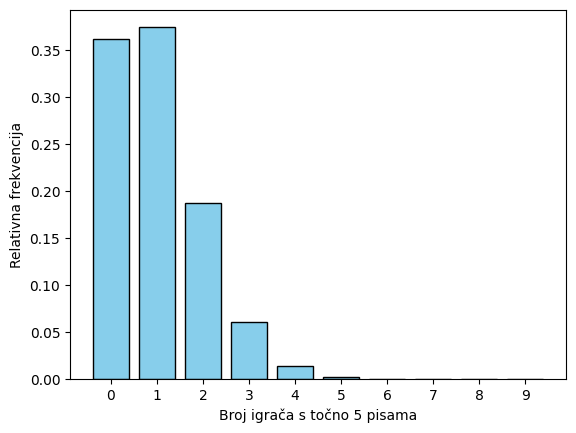

In [3]:
# historgam relativnih frekvencija
brojevi_igraca = list(rezultati_m.keys())
frekvencije = [rezultati_m[k] / M for k in brojevi_igraca]
plt.bar(brojevi_igraca, frekvencije, width=0.8, color='skyblue', edgecolor='black')
plt.xlabel(f'Broj igrača s točno {K} pisama')
plt.ylabel('Relativna frekvencija')
#plt.title(f'Raspodjela broja igrača s točno K={K} pisama nakon {M} simulacija')
plt.xticks(brojevi_igraca)
#plt.grid(axis='n')
# ispis u pdf
plt.savefig('histogram_relativnih_frekvencija.pdf')

plt.show()


In [12]:
def pobjednici_simulacija(N, K, M, seed=42):
    """
    Ponavlja simulaciju M puta i broji koliko puta je određeni učenik bio JEDINI
    koji je imao točno K pisama.
    
    Argumenti:
    - N: broj učenika po simulaciji
    - K: broj pisama koje trebamo
    - M: broj ponavljanja simulacije
    - seed: seed za random generator
    
    Vraća:
    - dict: rječnik gdje su ključevi redni brojevi učenika (1-N),
            a vrijednosti koliko puta je taj učenik bio jedini s K pisama
    """
    pobjednici = {i: 0 for i in range(1, N + 1)}  # inicijalizacija
    
    np.random.seed(seed)
    
    for simulacija in range(M):
        # Ispis napredka svakih 100000 simulacija
        if (simulacija + 1) % 100000 == 0:
            print(f"Simulacija {simulacija + 1} od {M}...")
        
        # Izvršimo jednu simulaciju
        rezultati = simulacija_igre(N, K, seed=seed+simulacija)
        
        # Pronađi sve učenike koji su imali točno K pisama
        ucenci_s_K_pisama = []
        for i, (ucenik, broj_pisama) in enumerate(rezultati.items(), 1):
            if broj_pisama == K:
                ucenci_s_K_pisama.append(i)
        
        # Ako je točno jedan učenik imao K pisama, on je pobjednik
        if len(ucenci_s_K_pisama) == 1:
            pobjednici[ucenci_s_K_pisama[0]] += 1
    
    return pobjednici

# Parametri
N = 32  # broj učenika
K = 5   # broj pisama
M = 1000000  # broj ponavljanja simulacije

print("Pokretanje simulacije s parametrima:")
print(f"N = {N} učenika")
print(f"K = {K} bacanja")
print(f"M = {M} ponavljanja")
print()

# Izvršavanje simulacije
pobjednici = pobjednici_simulacija(N, K, M)

# Prikaz rezultata
print("\nREZULTATI SIMULACIJE POBJEDNIKA")
print("=" * 60)
print(f"Koliko puta je koji učenik bio JEDINI s točno {K} pisama:")
print("-" * 60)

ukupno_pobjednika = sum(pobjednici.values())
print(f"Ukupno simulacija gdje je bio jedini pobjednik: {ukupno_pobjednika}")
print()

for ucenik_broj in sorted(pobjednici.keys()):
    broj_pobjeda = pobjednici[ucenik_broj]
    if broj_pobjeda > 0:
        postotak = (broj_pobjeda / M) * 100
        print(f"Učenik {ucenik_broj:2d}: {broj_pobjeda:7d} pobjeda ({postotak:.4f}%)")

print("-" * 60)
print(f"\nProsječan broj pobjeda po učeniku: {np.mean(list(pobjednici.values())):.4f}")
print(f"Standardna devijacija: {np.std(list(pobjednici.values())):.4f}")


Pokretanje simulacije s parametrima:
N = 32 učenika
K = 5 bacanja
M = 1000000 ponavljanja

Simulacija 100000 od 1000000...
Simulacija 200000 od 1000000...
Simulacija 300000 od 1000000...
Simulacija 400000 od 1000000...
Simulacija 500000 od 1000000...
Simulacija 600000 od 1000000...
Simulacija 700000 od 1000000...
Simulacija 800000 od 1000000...
Simulacija 900000 od 1000000...
Simulacija 1000000 od 1000000...

REZULTATI SIMULACIJE POBJEDNIKA
Koliko puta je koji učenik bio JEDINI s točno 5 pisama:
------------------------------------------------------------
Ukupno simulacija gdje je bio jedini pobjednik: 373818

Učenik  1:   11498 pobjeda (1.1498%)
Učenik  2:   11737 pobjeda (1.1737%)
Učenik  3:   11690 pobjeda (1.1690%)
Učenik  4:   11786 pobjeda (1.1786%)
Učenik  5:   11727 pobjeda (1.1727%)
Učenik  6:   11543 pobjeda (1.1543%)
Učenik  7:   11740 pobjeda (1.1740%)
Učenik  8:   11706 pobjeda (1.1706%)
Učenik  9:   11726 pobjeda (1.1726%)
Učenik 10:   11585 pobjeda (1.1585%)
Učenik 11:  

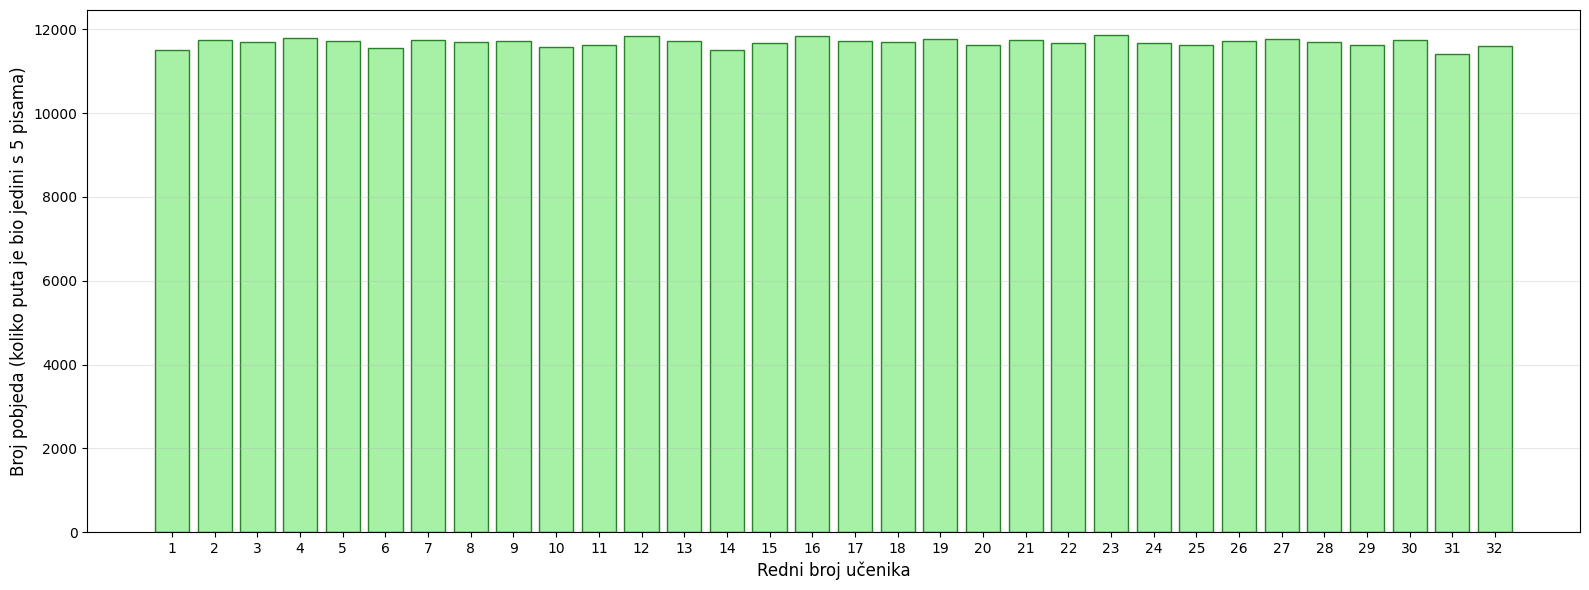


Rječnik rezultata:
{1: 11498, 2: 11737, 3: 11690, 4: 11786, 5: 11727, 6: 11543, 7: 11740, 8: 11706, 9: 11726, 10: 11585, 11: 11612, 12: 11829, 13: 11726, 14: 11502, 15: 11682, 16: 11833, 17: 11712, 18: 11690, 19: 11761, 20: 11613, 21: 11740, 22: 11669, 23: 11865, 24: 11663, 25: 11620, 26: 11730, 27: 11763, 28: 11705, 29: 11635, 30: 11738, 31: 11399, 32: 11593}


In [15]:
# Frekvencijski dijagram - koliko puta je koji učenik jedini imao K bacanja
ucenici = sorted(pobjednici.keys())
pobjede = [pobjednici[u] for u in ucenici]

plt.figure(figsize=(16, 6))
bars = plt.bar(ucenici, pobjede, color='lightgreen', edgecolor='darkgreen', alpha=0.8, width=0.8)

plt.xlabel('Redni broj učenika', fontsize=12)
plt.ylabel(f'Broj pobjeda (koliko puta je bio jedini s {K} pisama)', fontsize=12)
#plt.title(f'Frekvencijski dijagram - Broj pobjeda svakog učenika\n(M={M} simulacija, N={N} učenika, K={K} pisama)', fontsize=14)
plt.xticks(ucenici)
plt.grid(axis='y', alpha=0.3)

# Dodaj vrijednosti na stupce
#for bar in bars:
#    height = bar.get_height()
#    if height > 0:
#        plt.text(bar.get_x() + bar.get_width()/2., height,
#                f'{int(height)}',
#                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('frekvencijski_dijagram_pobjednika.pdf', dpi=150)
plt.show()

print("\nRječnik rezultata:")
print(pobjednici)
